# Problem 4: NLP Sentiment Analysis

In this notebook, we are going to perform sentiment analysis on all the reviews for Berlin listings, to determine if the overall sentiment for each listing is positive or negative. Based off this, we can give each listing a sentiment score, which can be used for any strategic decision by Airbnb to understand concerns of users, or for marketing purposes, where it can help make decisions for what listings to show. If for example the general sentiment is all very high, then Airbnb can conclude that they are able to maintain good customer satisfaction.

An immediate complication is that our data is unlabelled. This makes training a NLP model to recognise positive and negative sentiments difficult. To overcome this we will use a library called *textblob*. Linguistic researches have labelled the sentiments of words based on their domain expertise, and we will be leveraging this for our purpose. Each word is labelled in terms of:
- polarity: how positive or negative a word is (from -1 to 1, with 1 being the most positive)
- subjectivity: how subjective or opinionated a word is (from 0 to 1, with 0 being a fact and 1 being an opinion)

The score depends on where the words are in a sentence.


***
We will first import the libraries we need and read in the required files.

In [11]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# Assign common path for all the files
file_path = '/Users/jeffreylee/Documents/'

# Assign path for each csv file
file_listings = file_path + 'Berlin_Airbnb_Dataset/listings.csv'
file_reviews = file_path + 'Berlin_Airbnb_Dataset/reviews.csv'

# Read in all the files into panda dataframes
df_listings = pd.read_csv(file_listings)
df_reviews = pd.read_csv(file_reviews)

We will start by examining what the review data looks like.

In [3]:
display(df_reviews.head(10))

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."
5,2015,74690922,2016-05-16,39859815,Eil,"Jan ist super flexibel und gut zu erreichen, w..."
6,2015,76603178,2016-05-28,29323516,Laurent,"We had a very nice stay in Berlin, thanks to J..."
7,2015,77296201,2016-05-31,9025122,Rasmus,"Great location close to Mauerpark, Kastanienal..."
8,2015,77834906,2016-06-03,39244464,Sabine,"Perfekte Lage, perfekte Ausstattung, perfekter..."
9,2015,82322683,2016-06-27,73902920,Mag,"Apartment very well located, close to everythi..."


For each of these comments, we will use TextBlob to determine the polarity and subjectivity.

In [4]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

def subjectivity_calc(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

df_reviews['polarity'] = df_reviews['comments'].apply(polarity_calc)
df_reviews['subjectivity'] = df_reviews['comments'].apply(subjectivity_calc)

We will then group by listing, and determine the average polarity and subjectivity for each.

In [5]:
# Group by id, and determine total income, and number of days the property was rented out
df_reviews_g = df_reviews.groupby(
    ['listing_id'] # group by listing_id
).agg(
    {
        'polarity':['mean'], # average polarity for a listing
        'subjectivity':['mean'], # average subjectivity for a listing
        'id':['count'] # total number of reviews
    }
)
df_reviews_g.columns = df_reviews_g.columns.droplevel(1) # drop multi-level

In [9]:
df_reviews_g.head(10)

,polarity,subjectivity,id
listing_id,,,
2015,0.353835,0.488118,118
2695,0.391583,0.667454,6
3176,0.381437,0.563021,143
3309,0.316826,0.461974,25
7071,0.392842,0.572338,197
9991,0.385756,0.481595,6
14325,0.375830,0.550222,23
16644,0.369184,0.559013,48
17409,0.315920,0.553724,279


Finally, we will plot the polarity and subjectivity on a histogram to visualise the distribution.

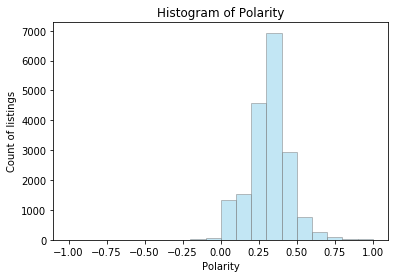

In [15]:
# Plot histogram of polarity
binwidth = 0.1
plt.hist(df_reviews_g['polarity'],
         color='skyblue',
         lw=1,
         ec='gray',
         alpha=0.5,
         bins=np.arange(min(df_reviews_g['polarity']),
                   max(df_reviews_g['polarity']) + binwidth, binwidth))
plt.title('Histogram of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count of listings');

The polarity is nearly all above 0, with a relative normal distribution between 0 and 1. This indicates that nearly all reviews are overall positive. This is a good sign for Airbnb, since they want users to be satisfied.

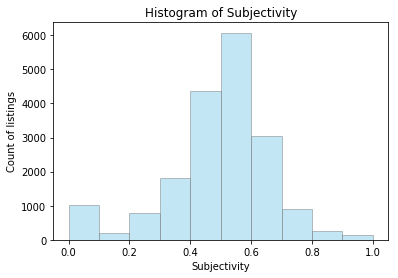

In [16]:
# Plot histogram of subjectivity
binwidth = 0.1
plt.hist(df_reviews_g['subjectivity'],
         color='skyblue',
         lw=1,
         ec='gray',
         alpha=0.5,
         bins=np.arange(min(df_reviews_g['subjectivity']),
                   max(df_reviews_g['subjectivity']) + binwidth, binwidth))
plt.title('Histogram of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Count of listings');

Looking at the subjectivity, we can see that it is quite normally distributed as well. This indicates that most reviews are a mixture of fact and opinion.

***

We will examine one final additional analysis.

**Is there any correlation between average review sentiment and number of reviews?**

We will plot a scatter plot of polarity against review count, and subjectivity and review count.

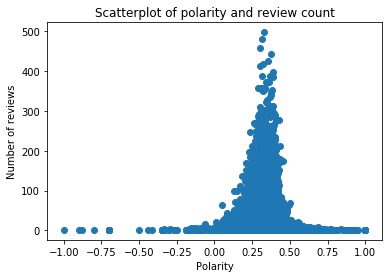

In [18]:
# Draw the scatter plot
xData = df_reviews_g['polarity']
yData = df_reviews_g['id']

plt.scatter(xData, yData)
plt.title('Scatterplot of polarity and review count')
plt.xlabel('Polarity')
plt.ylabel('Number of reviews')
plt.show()

We can see that there are actually no listings with many reviews that have an average polarity that is very low. This is good news, since it implies that the listings with bad reviews could be just due to one bad review. However it is also likely that bad reviews for a listing would naturally result in very few users, and therefore low number of reviews.

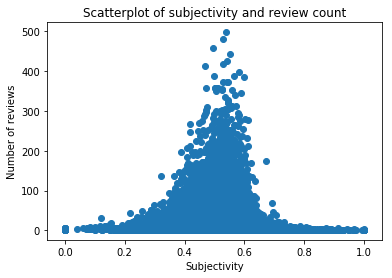

In [20]:
# Draw the scatter plot
xData = df_reviews_g['subjectivity']
yData = df_reviews_g['id']

plt.scatter(xData, yData)
plt.title('Scatterplot of subjectivity and review count')
plt.xlabel('Subjectivity')
plt.ylabel('Number of reviews')
plt.show()

We see that all listings with many reviews have subjectivity around the middle (0.5). This is not suprising, as those with a subjectivity 0 and 1 are likely short reviews, and as number of reviews increases, it is likely to move away from the two extremes.